<a href="https://colab.research.google.com/github/xadrijo/neural-network-multiclass-classification-tensorflow/blob/main/multiclass_classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification

We're going to build a neural network to classify images of different items



In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

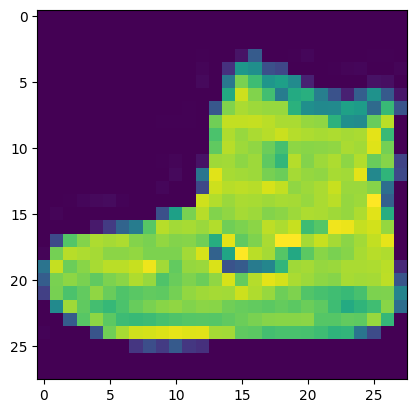

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [ ]:
# Create a small list so we can index onto out training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Coat')

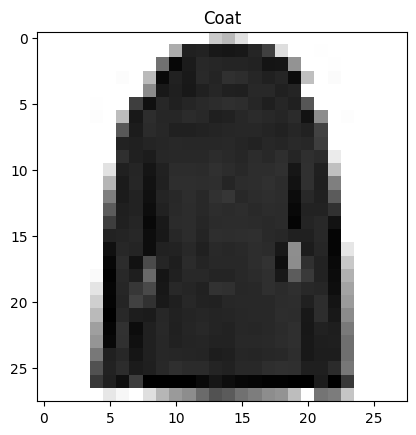

In [ ]:
# Plot an example image and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

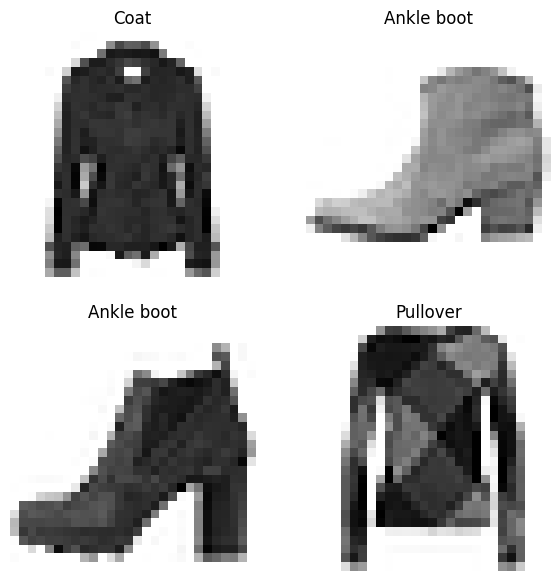

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.
CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
non_norm_history = model.fit(train_data,
                             train_labels,
                             epochs=10,
                             validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9524 - accuracy: 0.2264 - val_loss: 1.7575 - val_accuracy: 0.2719
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6708 - accuracy: 0.2931 - val_loss: 1.6122 - val_accuracy: 0.3323
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5711 - accuracy: 0.3341 - val_loss: 1.5584 - val_accuracy: 0.3304
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5354 - accuracy: 0.3411 - val_loss: 1.5328 - val_accuracy: 0.3455
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5158 - accuracy: 0.3482 - val_loss: 1.5220 - val_accuracy: 0.3528
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5037 - accuracy: 0.3566 - val_loss: 1.5145 - val_accuracy: 0.3318
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4966 - accuracy: 0.3576 - val_loss: 1.5263 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 4)                 3140      
                                                                 
 dense_34 (Dense)            (None, 4)                 20        
                                                                 
 dense_35 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [ ]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_normalized = train_data / 255.0
test_data_normalized = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_normalized.min(), train_data_normalized.max()

(0.0, 1.0)

In [ ]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
norm_history = model_2.fit(train_data_normalized,
                           train_labels,
                           epochs=10,
                           validation_data=(test_data_normalized, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1625 - accuracy: 0.5436 - val_loss: 0.7661 - val_accuracy: 0.7227
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6997 - accuracy: 0.7446 - val_loss: 0.6857 - val_accuracy: 0.7353
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6464 - accuracy: 0.7610 - val_loss: 0.6520 - val_accuracy: 0.7542
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6245 - accuracy: 0.7706 - val_loss: 0.6336 - val_accuracy: 0.7625
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6091 - accuracy: 0.7757 - val_loss: 0.6272 - val_accuracy: 0.7613
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5982 - accuracy: 0.7784 - val_loss: 0.6209 - val_accuracy: 0.7669
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5910 - accuracy: 0.7805 - val_loss: 0.6251 - val_accuracy:

> **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

<Axes: title={'center': 'Normalized data'}>

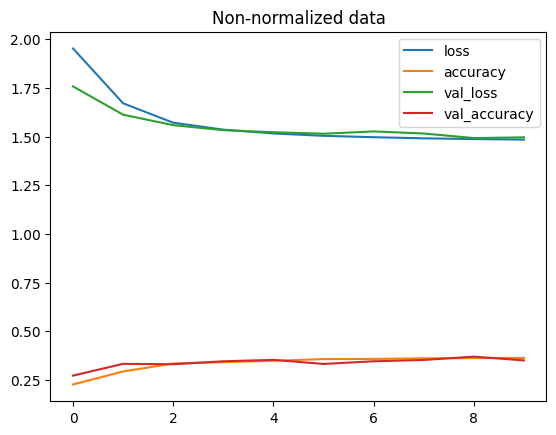

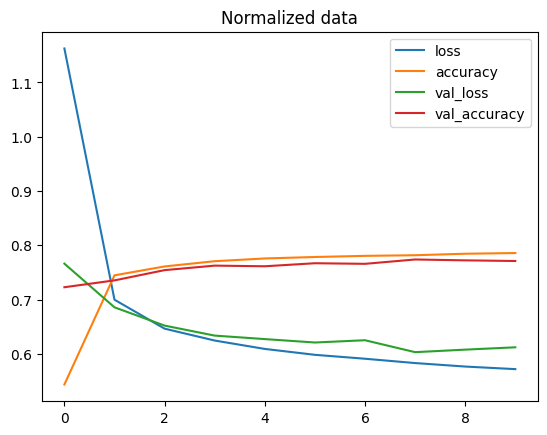

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e. g. same architecture but different data or same data but different architecture).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_3.compile(loss=tf.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_3.fit(train_data_normalized,
                              train_labels,
                              epochs=40,
                              validation_data=(test_data_normalized, test_labels),
                              callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2845 - accuracy: 0.5233 - val_loss: 0.9182 - val_accuracy: 0.6185 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8355 - accuracy: 0.6682 - val_loss: 0.7984 - val_accuracy: 0.7001 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7320 - accuracy: 0.7318 - val_loss: 0.7276 - val_accuracy: 0.7346 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6829 - accuracy: 0.7531 - val_loss: 0.6878 - val_accuracy: 0.7520 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6628 - accuracy: 0.7587 - val_loss: 0.6773 - val_accuracy: 0.7529 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6500 - accuracy: 0.7643 - val_loss: 0.6972 - val_accuracy: 0.7563 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

Text(0.5, 1.0, 'Finding the ideal learning rate')

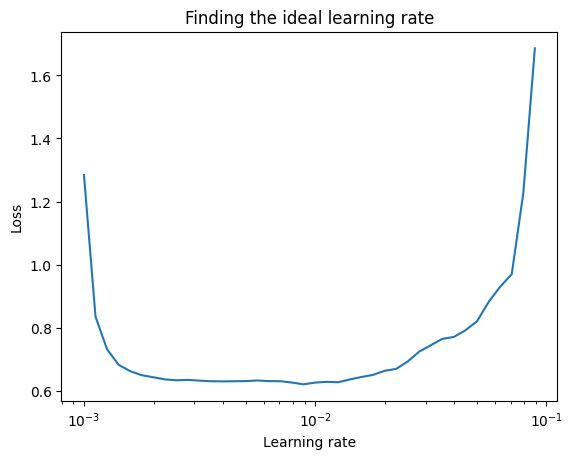

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
10**-3

0.001

In [ ]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
model_4.fit(train_data_normalized,
            train_labels,
            epochs=20,
            validation_data=(test_data_normalized, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 1.2352 - accuracy: 0.5661 - val_loss: 0.9179 - val_accuracy: 0.6803
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7990 - accuracy: 0.7006 - val_loss: 0.7897 - val_accuracy: 0.7006
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6860 - accuracy: 0.7383 - val_loss: 0.6901 - val_accuracy: 0.7502
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6119 - accuracy: 0.7988 - val_loss: 0.6060 - val_accuracy: 0.8030
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5438 - accuracy: 0.8156 - val_loss: 0.5568 - val_accuracy: 0.8097
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5148 - accuracy: 0.8237 - val_loss: 0.5832 - val_accuracy: 0.8011
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5039 - accuracy: 0.8258 - val_loss: 0.5520 - val_accura

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Assess some of its prediction (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's got through the top 2

In [ ]:
# Make some predictions with our model
y_proba = model_4.predict(test_data_normalized)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_proba[:5]

array([[7.96432258e-04, 8.38716922e-04, 1.28168473e-03, 1.81836437e-03,
        2.39668967e-04, 1.62010416e-01, 5.66918694e-04, 6.50379658e-02,
        1.50731602e-03, 7.65902519e-01],
       [3.51928035e-03, 5.04671607e-06, 7.75067747e-01, 7.53671827e-07,
        2.33365167e-02, 0.00000000e+00, 1.97937384e-01, 0.00000000e+00,
        1.33257068e-04, 0.00000000e+00],
       [4.12138149e-07, 9.99236345e-01, 5.54783270e-04, 1.69126259e-04,
        3.91019312e-05, 7.17686208e-30, 2.38800396e-07, 8.16237858e-38,
        1.24446850e-12, 6.28893756e-18],
       [4.68278216e-07, 9.98803139e-01, 4.76466375e-04, 6.38161844e-04,
        8.14990999e-05, 5.93144958e-25, 3.38821792e-07, 6.28882223e-34,
        6.27175135e-12, 1.07612732e-14],
       [1.23924725e-01, 1.50175169e-04, 1.05489917e-01, 2.44723372e-02,
        7.59787783e-02, 1.02325584e-16, 6.52192831e-01, 3.43220206e-24,
        1.77911483e-02, 3.50135892e-20]], dtype=float32)

> 🔑**Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [ ]:
y_proba[0], tf.argmax(y_proba[0]), class_names[tf.argmax(y_proba[0])]

(array([7.9643226e-04, 8.3871692e-04, 1.2816847e-03, 1.8183644e-03,
        2.3966897e-04, 1.6201042e-01, 5.6691869e-04, 6.5037966e-02,
        1.5073160e-03, 7.6590252e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_proba.argmax(axis=1)

# View the first 10 predictions labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
# Create a confusion matrix
confusion_matrix = tf.math.confusion_matrix(labels=test_labels,
                                            predictions=y_preds)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[761,   5,  25,  88,   1,   1, 102,   1,  16,   0],
       [  1, 960,  12,  20,   4,   0,   1,   0,   2,   0],
       [ 18,   9, 709,  10, 194,   0,  49,   0,  11,   0],
       [ 38,  28,  17, 823,  41,   1,  44,   2,   5,   1],
       [  0,   3, 103,  24, 808,   0,  56,   0,   6,   0],
       [  1,   0,   0,   0,   0, 912,   0,  44,   7,  36],
       [147,   5, 140,  45, 184,   1, 432,   0,  46,   0],
       [  0,   0,   0,   0,   0,  41,   0, 912,   2,  45],
       [  1,   0,   5,  11,   2,  13,  23,   6, 939,   0],
       [  0,   0,   0,   0,   0,  17,   0,  36,   1, 946]], dtype=int32)>

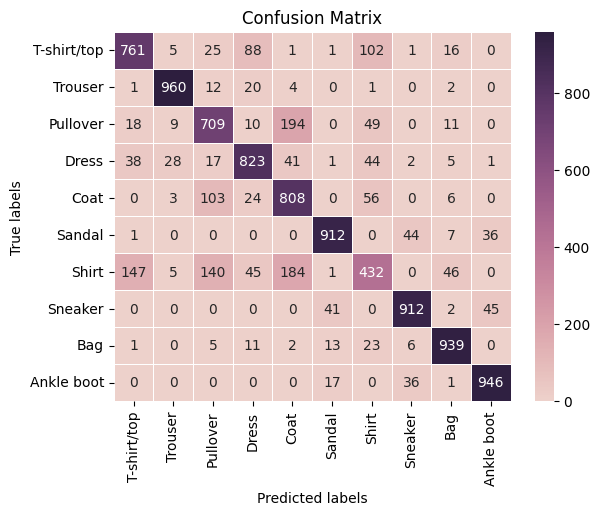

In [ ]:
# Plot the confusion matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix,
            annot=True,
            cmap=sns.cubehelix_palette(as_cmap=True),
            fmt='d',
            ax=ax,
            xticklabels=class_names,
            yticklabels=class_names,
            linewidth=.5)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');

> 🔑 **Note:** When we are working with images and other forms of visual data , it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

Let's create a function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)


1/1 [==============================] - 0s 25ms/step


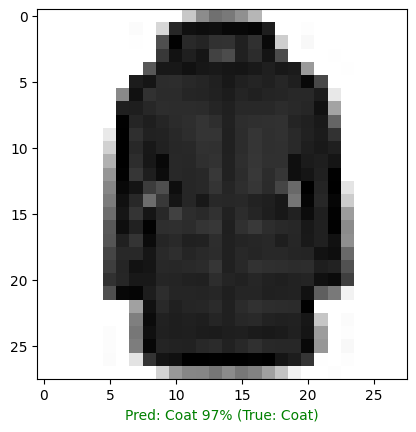

In [ ]:
# Checks out a random image as well as its prediction
plot_random_image(model=model_4,
                  images=test_data_normalized,
                  true_labels=test_labels,
                  classes=class_names)

## What patter is our model learning?

In [ ]:
# Find the layers of our most recent model
model_4.layers

In [ ]:
# Extract a particular layer
model_4.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_4.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.1737236 , -0.31924075, -0.52780557,  0.773388  ],
        [-0.30954593, -0.4873196 ,  0.14373912,  0.67156833],
        [-0.95408654, -0.28304613, -0.5645072 ,  0.76799536],
        ...,
        [ 0.40063325, -0.6212403 ,  0.30199692,  0.4420685 ],
        [ 0.5184426 , -0.73089737,  0.05528231,  0.09461074],
        [ 0.02749992, -0.73137486, -0.01609292,  0.30835485]],
       dtype=float32),
 (784, 4))

In [ ]:
28 * 28

784

In [ ]:
model_4.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 4)                 3140      
                                                                 
 dense_43 (Dense)            (None, 4)                 20        
                                                                 
 dense_44 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


## Let's check out the bias vector

In [ ]:
# Bias and biases shapes
biases, biases.shape

(array([ 1.4362215 ,  0.9571971 , -0.15721616,  1.7944475 ], dtype=float32),
 (4,))

* Every neuron has a bias vector. Each of these is paired with a weights matrix.
* The bias vector get initialized as zeros (at least in the case of a TensorFlow Dense layer).
* The bias vector dictates how much the patterns within the corresponding weights matrix shoudl influence the next layer.

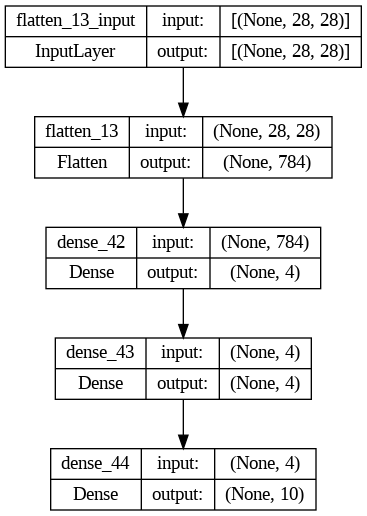

In [ ]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_4, show_shapes=True)